In [11]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from scipy.signal import find_peaks, convolve
import sys
import os
import re
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, parent_dir)
import matplotlibcolors
plt.style.use(parent_dir + '/matplotlibrc')

%matplotlib widget

In [12]:
files = glob('./*.npy')
files

['.\\LT192chip1_VNAsweep_20220120.npy', '.\\LT192chip1_VNAsweep_20230320.npy']

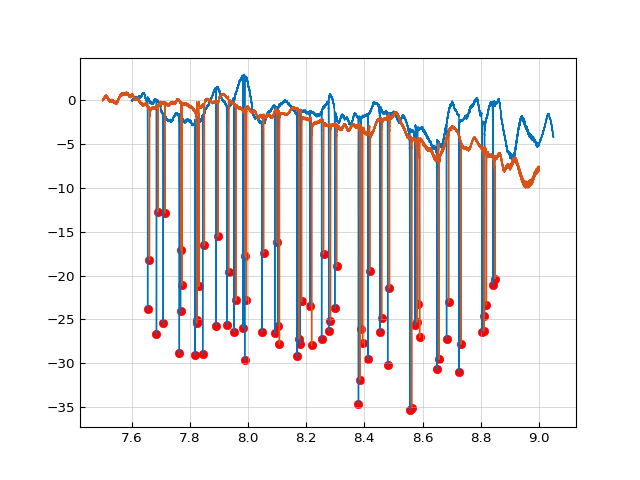

In [17]:
fig, ax = plt.subplots()
for i, file in enumerate(files):
    f, s21 = np.load(file)
    mph = 15
    mpp = 10
    s21 -= s21[0]
    locs, props = find_peaks(-s21, height=-mph, prominence=mpp)
    heights = props['peak_heights']
    ax.plot(f, s21)
    ax.scatter(f[locs], s21[locs], color='red')
    if i == 0:
        f0s = f[locs]
    if i == 1:
        f1s = f[locs]

4.681634852984081e-05


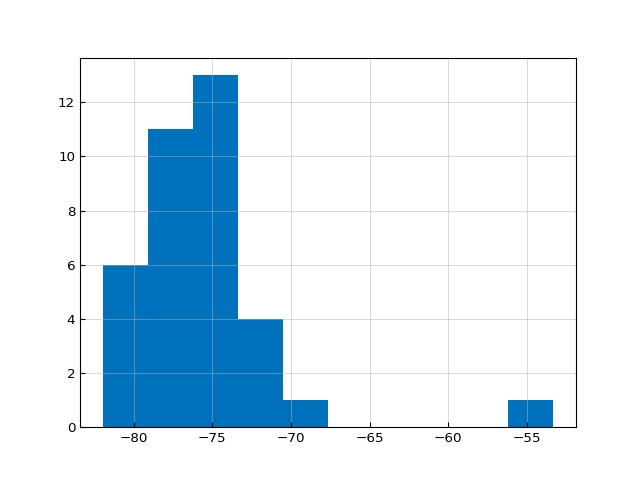

In [18]:
scatter = (f0s - f1s) / f1s
fig, ax = plt.subplots()
_ = ax.hist(scatter*1e5, bins=10)
print(scatter.std())

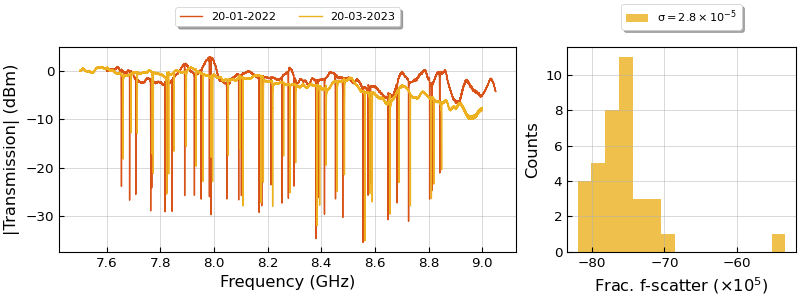

In [30]:
labels = ['20-01-2022', '20-03-2023', 'T ⇅ 30K ']
colors = ['o', 'y', 'p']
fig, ax = plt.subplot_mosaic('aab', constrained_layout=True, figsize=(8,3))
# ax['a'].plot(dark_freqs, dark_s21, label='Initial', c='k')
# ax['a'].scatter(dark_f0s, dark_s21_mins, c='k')
# bins = np.linspace(-4, 1, 40)
for i, file in enumerate(files):
    freqs, s21 = np.load(file)
    shift = np.mean(f0s - f1s)
    shift = 0
    scatter = (f0s - (f1s)) / (f1s)
    ax['a'].plot((freqs-shift), s21-s21[0], label=labels[i], c=colors[i])
ax['b'].hist(scatter*1e5, bins='auto', alpha=0.8, facecolor=colors[i], label='$\sigma=%.1f\\times 10^{-5}$' % (scatter.std()*1e5))
ax['a'].set_xlabel('Frequency (GHz)')
ax['a'].set_ylabel('|Transmission| (dBm)')
ax['a'].legend(loc='center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True)
ax['b'].legend(loc='center', bbox_to_anchor=(0.5, 1.15), ncol=2, fancybox=True, shadow=True)
ax['b'].set_xlabel('Frac. f-scatter ($\\times 10^5$)')
ax['b'].set_ylabel('Counts')
plt.savefig('aging_scatter.svg', dpi=300)